In [1]:
import utils
import numpy as np

In [35]:
# Load data
# data, Index, Class = utils.load_training_data()
data = utils.load_file_data('TESTING DATA/D2.mat')
shape = data.shape

In [36]:
# Generate noise
noise = np.random.normal(0, 3, shape)

In [ ]:
# Add noise to data
# noisy_data = data + noise
noisy_data = data

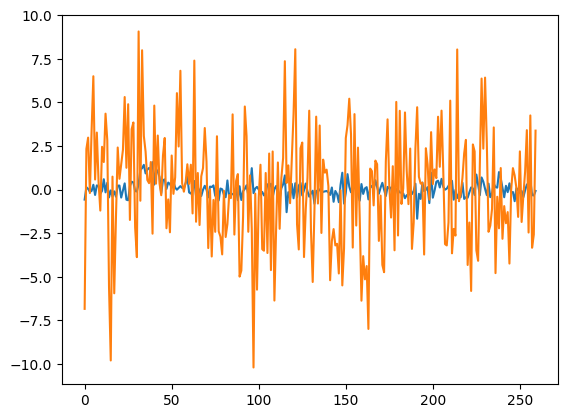

In [38]:
import matplotlib.pyplot as plt
plt.plot(data[2190:2450])
plt.plot(noisy_data[2190:2450])

In [66]:
from skimage.restoration import denoise_wavelet

# Use wavelets to denoise the data
denoised_data = denoise_wavelet(
        noisy_data, 
        method='BayesShrink', 
        mode='soft', 
        wavelet_levels=5,
        wavelet='bior6.8',
        rescale_sigma='True'
        )

# High-pass filter the data
numtaps = 1501
fc = 100
fs = 25000
filter_coef = utils.create_hp_filter(numtaps, fc, fs)
filtered_data = utils.filter_data(denoised_data, filter_coef, numtaps)

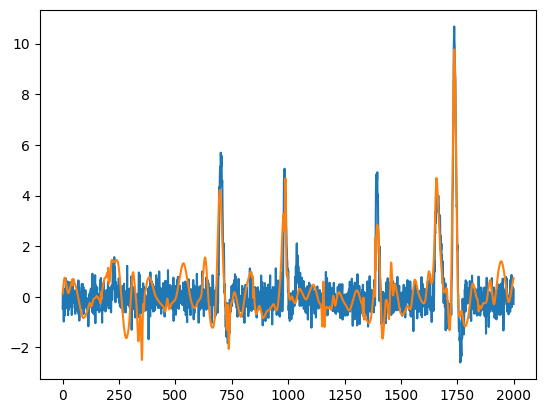

In [67]:
import matplotlib.pyplot as plt
plt.plot(data[2000:4000])
plt.plot(denoised_data[2000:4000])